<center> <img src="https://miro.medium.com/v2/resize:fit:1200/1*lbDXL0IuitCRz4mpZ7MmfQ.png" width=55% > </center>

<br><br>

<center> 
    <font size="6">Final Lab (Part 2): Image Classification using Convolutional Neural Networks </font>
</center>
<center> 
    <font size="4">Computer Vision 1 University of Amsterdam</font> 
</center>
<center> 
    <font size="4">Due 23:59PM, October 18, 2024 (Amsterdam time)</font> 
</center>
<center> 
    <font size="4"><b>TA's:  Yue, Konrad & Thies</b></font>
</center>

<br><br>

***

<br><br>

<center>

Student1 ID:  \
Student1 Name: 

Student2 ID: \
Student2 Name: 

Student3 ID: \
Student3 Name: 

( Student4 ID: \
Student4 Name: )

</center>

### **Coding Guidelines**

Your code must be handed in this Jupyter notebook, renamed to **StudentID1_StudentID2_StudentID3.ipynb** before the deadline by submitting it to the Canvas Final Lab: Image Classification Assignment. Please also fill out your names and IDs above.

For full credit, make sure your notebook follows these guidelines:

- Please express your thoughts **concisely**. The number of words does not necessarily correlate with how well you understand the concepts.
- Understand the problem as much as you can. When answering a question, provide evidence (qualitative and/or quantitative results, references to papers, figures, etc.) to support your arguments. Not everything might be explicitly asked for, so think about what might strengthen your arguments to make the notebook self-contained and complete.
- Tables and figures must be accompanied by a **brief** description. Add a number, a title, and, if applicable, the name and unit of variables in a table, and name and unit of axes and legends in a figure.

**Late submissions are not allowed.** Assignments submitted after the strict deadline will not be graded. In case of submission conflicts, TAs’ system clock is taken as reference. We strongly recommend submitting well in advance to avoid last-minute system failure issues.

**Environment:** Since this is a project-based assignment, you are free to use any feature descriptor and machine learning tools (e.g., K-means, SVM). You should use Python for your implementation. You are free to use any Python library for this assignment, but make sure to provide a conda environment file!

**Plagiarism Note:** Keep in mind that plagiarism (submitted materials which are not your work) is a serious offense and any misconduct will be addressed according to university regulations. This includes using generative tools such as ChatGPT.

**Ensure that you save all results/answers to the questions (even if you reuse some code).**

### **Report Preparation**

Your tasks include the following:

1. **Report Preparation:** For both parts of the final project, students are expected to prepare a report. The report should include all details on implementation approaches, analysis of results for different settings, and visualizations illustrating experiments and performance of your implementation. Grading will be based on the report, so it should be as self-contained as possible. If the report contains faulty results or ambiguities, TAs can refer to your code for clarification. 

2. **Explanation of Results:** Do not just provide numbers without explanation. Discuss different settings to show your understanding of the material and processes involved.

3. **Quantitative Evaluation:** For quantitative evaluation, you are expected to provide the results based on performance (accuracy, learning loss and learning curves). 

4. **Aim:** Understand the basic Image Classification pipeline using Convolutional Neural Nets (CNN's).

5. **Working on Assignments:** Students should work in assigned groups for **two** weeks. Any questions can be discussed on ED.

    - **Submission:** Submit your source code and report together in a zip file (`ID1_ID2_ID3_part2.zip`). The report should be a maximum of 10 pages (single-column, including tables and figures, excluding references and appendix). Express thoughts concisely. Tables and figures must be accompanied by a description. Number them and, if applicable, name variables in tables, and label axes in figures.

6. **Hyperparameter Search:** In your experiments, remember to perform a hyperparameter search to find the optimal settings for your model(s). Clearly document the search process, the parameters you explored, and how they influenced the performance of your model.

8. **Format and Testing:** The report should be in **PDF format**, and the code in **.ipynb format**. Test that all functionality works as expected in the notebook.

### **Overview**

- [Section 1: Image Classification on CIFAR-100 (0 points)](#section-1)
- [Section 2: Visualizing CIFAR-100 Classes and Subclasses (3 points)](#section-2)
- [Section 3: TwoLayerNet Architecture (2 points)](#section-3)
- [Section 4: ConvNet Architecture (2 points)](#section-4)
- [Section 5: Preparation of Training (7 points)](#section-5)
- [Section 6: Training the Networks (5 points)](#section-6)
- [Section 7: Setting Up the Hyperparameters (14 points)](#section-7)
- [Section 8: Visualizing the STL-10 Dataset and Preparing the Data Loader (3 points)](#section-8)
- [Section 9: Fine-tuning ConvNet on STL-10 (14 points)](#section-9)
- [Section 10: Bonus Challenge (optional)](#section-10)
- [Section X: Individual Contribution Report (Mandatory)](#section-x)

### **Section 1: Image Classification on CIFAR-100 (0 points)**

The goal of this lab is to implement an image classification system using Convolutional Neural Networks (CNNs) that can identify objects from a set of classes in the [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html). You will implement and compare two different architectures: a simple two-layer network and a ConvNet based on the LeNet architecture.

The CIFAR-100 dataset contains 32x32 pixel RGB images, categorized into 100 different classes. The dataset will be automatically downloaded and loaded using the code provided in this notebook.

You will train and test your classification system using the entire CIFAR-100 dataset. Ensure that the test images are excluded from training to maintain a fair evaluation of the model's performance.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

from PIL import Image
from torchinfo import summary
from torch.utils.data import DataLoader, Dataset, random_split

# Define the transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  
])

# Load the CIFAR-100 training set
train_set = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)

# Load the CIFAR-100 test set
test_set = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)

# Create data loaders for the entire CIFAR-100 dataset
train_data_loader = DataLoader(train_set, shuffle=True)
test_data_loader = DataLoader(test_set, shuffle=False)

# Define CIFAR-100 superclasses and their subclasses
superclasses = {
    'aquatic mammals': ['beaver', 'dolphin', 'otter', 'seal', 'whale'],
    'fish': ['aquarium_fish', 'flatfish', 'ray', 'shark', 'trout'],
    'flowers': ['orchid', 'poppy', 'rose', 'sunflower', 'tulip'],
    'food containers': ['bottle', 'bowl', 'can', 'cup', 'plate'],
    'fruit and vegetables': ['apple', 'mushroom', 'orange', 'pear', 'sweet_pepper'],
    'household electrical devices': ['clock', 'keyboard', 'lamp', 'telephone', 'television'],
    'household furniture': ['bed', 'chair', 'couch', 'table', 'wardrobe'],
    'insects': ['bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach'],
    'large carnivores': ['bear', 'leopard', 'lion', 'tiger', 'wolf'],
    'large man-made outdoor things': ['bridge', 'castle', 'house', 'road', 'skyscraper'],
    'large natural outdoor scenes': ['cloud', 'forest', 'mountain', 'plain', 'sea'],
    'large omnivores and herbivores': ['camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo'],
    'medium-sized mammals': ['fox', 'porcupine', 'possum', 'raccoon', 'skunk'],
    'non-insect invertebrates': ['crab', 'lobster', 'snail', 'spider', 'worm'],
    'people': ['baby', 'boy', 'girl', 'man', 'woman'],
    'reptiles': ['crocodile', 'dinosaur', 'lizard', 'snake', 'turtle'],
    'small mammals': ['hamster', 'mouse', 'rabbit', 'shrew', 'squirrel'],
    'trees': ['maple_tree', 'oak_tree', 'palm_tree', 'pine_tree', 'willow_tree'],
    'vehicles 1': ['bicycle', 'bus', 'motorcycle', 'pickup_truck', 'train'],
    'vehicles 2': ['lawn_mower', 'rocket', 'streetcar', 'tank', 'tractor']
}

# List of all CIFAR-100 classes
classes = ('apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 
           'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
           'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
           'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
           'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
           'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
           'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea',
           'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 
           'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 
           'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm')

# Create a mapping of class names to their indices
class_to_idx = {cls_name: idx for idx, cls_name in enumerate(classes)}

# Create a mapping of superclasses to their corresponding class indices
superclass_to_indices = {supcls: [class_to_idx[cls] for cls in subclasses] for supcls, subclasses in superclasses.items()}

print("Data loaders for CIFAR-100 are ready for use.")

Files already downloaded and verified
Files already downloaded and verified
Data loaders for CIFAR-100 are ready for use.


<a id="section-2"></a>
### **Section 2: Visualizing CIFAR-100 Classes and Subclasses (3 points)**

In this section, you will implement a function to visualize the CIFAR-100 dataset, including **all** superclasses and their corresponding subclasses. Your implementation should provide a clear and organized overview of the dataset's diversity.

You add the figure(s) to appendix of your report and refer to it in the main text.

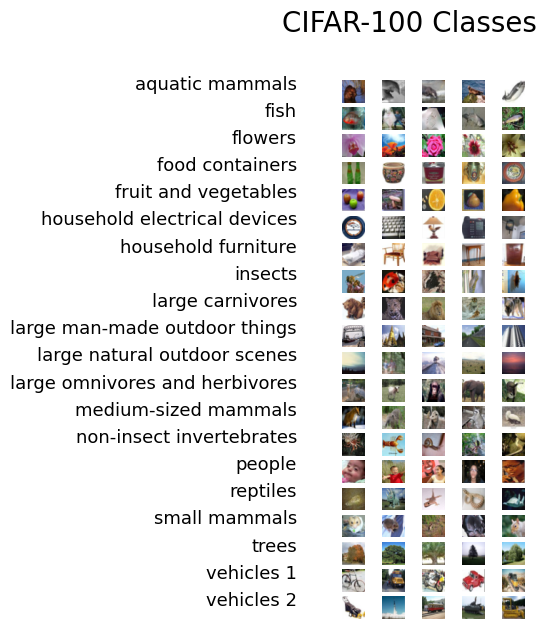

In [2]:
import matplotlib.pyplot as plt


num_classes = len(class_to_idx)
num_superclasses = len(superclass_to_indices)
nrows = 5
reps = {}
tosample = set(range(num_classes))
for elem in test_data_loader:
    _, label = elem
    label = label.item()
    if label in tosample:
        tosample.remove(label)
        reps[label] = elem[0]
    if len(tosample) == 0:
        break

fig, axes = plt.subplots(nrows=num_superclasses, ncols=nrows + 1, figsize=(3, 7))
fig.suptitle("CIFAR-100 Classes", fontsize=20)

for i, (supcls, subclasses) in enumerate(superclasses.items()):
    axes[i, 0].text(0, 0.4, supcls, verticalalignment='bottom', horizontalalignment='right', fontsize=13)
    axes[i, 0].axis('off')
    for j, idx in enumerate(subclasses):
        img = reps[class_to_idx[idx]][0]
        img = img / 2 + 0.5     # unnormalize
        img = img.numpy().transpose(1, 2, 0)
        axes[i, j + 1].imshow(img)
        # axes[i, j].set_title(subclasses[idx])
        axes[i, j + 1].axis('off')


<a id="section-3"></a>
### **Section 3: TwoLayerNet Architecture (2 points)**

In this section, you will implement the architecture of a fully connected neural network called `TwoLayerNet`, consisting of two fully connected layers with a ReLU activation in between. The network accepts an input size of 3x32x32 (CIFAR-100 image), a specified hidden layer size, and the number of output classes. In the `__init__` method, define the first fully connected layer that maps the input size to the hidden size, and the second fully connected layer that maps the hidden size to the number of classes. 

Ensure to call the parent class constructor using `super(TwoLayerNet, self).__init__()`. In the `forward` method, flatten the input tensor, pass it through the first layer with ReLU activation, and then through the second layer to obtain the final scores.

**Note:** You are allowed to modify the provided function definitions as needed.

In [3]:
class TwoLayerNet(nn.Module):
    def __init__(
            self, 
            input_size, 
            hidden_size, 
            num_classes,
            more_layers=False,
            norm=False, 
            activation='relu'):
        '''
        Initializes the two-layer neural network model.

        Args:
            input_size (int): The size of the input features.
            hidden_size (int): The size of the hidden layer.
            num_classes (int): The number of classes in the dataset.
        '''
        super(TwoLayerNet, self).__init__()

        if norm:
            self.norm = torch.nn.BatchNorm1d
        else:
            self.norm = torch.nn.Identity

        if activation == 'relu':
            self.activation = torch.nn.ReLU()
        elif activation == 'tanh':
            self.activation = torch.nn.Tanh()
        else:
            raise ValueError(f'Unknown activation function: {activation}')

        layers = [
            torch.nn.Linear(input_size, hidden_size),
            self.activation,
            self.norm(hidden_size),
        ]

        if more_layers:
            layers.append(torch.nn.Linear(hidden_size, hidden_size))
            layers.append(self.activation)
            layers.append(self.norm(hidden_size))

            layers.append(torch.nn.Linear(hidden_size, hidden_size))
            layers.append(self.activation)
            layers.append(self.norm(hidden_size))

        layers.append(torch.nn.Linear(hidden_size, num_classes))
        self.cls = nn.Sequential(*layers)

    def forward(self, x):
        '''
        Defines the forward pass of the neural network.

        Args:
            x (torch.Tensor): The input tensor.

        Returns:
            torch.Tensor: The output tensor.
        '''
        batch_size = x.shape[0]
        x = x.view(batch_size, -1)
        return self.cls(x)

In [4]:
cpool = nn.Conv2d(in_channels=3, out_channels=1, kernel_size=1)
cpool.weight.data.fill_(1)
cpool.bias.data.fill_(0)
img = reps[0][0]
print(img.shape)
print(img[:,0,0])
print(img[:, 0, 0].sum())

out = cpool(img)
print(out.shape)
print(out[:,0,0])

torch.Size([3, 32, 32])
tensor([0.4275, 0.3961, 0.4824])
tensor(1.3059)
torch.Size([1, 32, 32])
tensor([1.3059], grad_fn=<SelectBackward0>)


<a id="section-4"></a>
### **Section 4: ConvNet Architecture (2 points)**

In this section, you will implement a convolutional neural network inspired by the structure of [LeNet-5](https://ieeexplore.ieee.org/document/726791). The network processes color images using three convolutional layers followed by two fully connected layers. Since you need to feed color images into this network, determine the kernel size of the first convolutional layer. Additionally, calculate the number of trainable parameters in the "F6" layer, providing the calculation process.

In [55]:
class ConvNet(nn.Module):
    def __init__(self, out_classes=100, more_layers=False, activation='tanh', norm=False, pool='avg'):
        '''	
        Initializes the convolutional neural network model.

        Args:
            None
        '''
        super(ConvNet, self).__init__()
        if pool == 'avg':
            self.pool = nn.AvgPool2d
        elif pool == 'max':
            self.pool = nn.MaxPool2d
        else:
            raise ValueError("Invalid pooling type. Please choose either 'avg' or 'max' pooling.")
        
        if norm:
            self.norm = nn.BatchNorm2d
        else:
            self.norm = nn.Identity
        
        if activation == 'tanh':
            self.activation = nn.Tanh
        elif activation == 'relu':
            self.activation = nn.ReLU
        else:
            raise ValueError("Invalid activation function. Please choose either 'tanh' or 'relu'.")

        if more_layers:
            self.a1 = nn.Sequential(
                nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, stride=1, padding=2),
            )
            self.a2 = nn.Sequential(
                nn.AvgPool2d(kernel_size=2, stride=1, padding=1),
                self.norm(6)
            )
            self.l1 = nn.Sequential(
                nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5, stride=1, padding=0),
                self.activation()
            )
            self.l2 =nn.Sequential(
                self.pool(kernel_size=2, stride=2, padding=0),
                self.norm(12)
            )
            self.l3 = nn.Sequential(
                nn.Conv2d(in_channels=12, out_channels=24, kernel_size=5, stride=1, padding=0),
                self.activation()
            )
            self.l4 = nn.Sequential(
                self.pool(kernel_size=2, stride=2, padding=0),
                self.norm(24)
            )
            self.l5 = nn.Sequential(
                nn.Conv2d(in_channels=24, out_channels=196, kernel_size=5, stride=1, padding=0),
                self.activation()
            )
            self.l6 = nn.Sequential(
                nn.Linear(196, 84),
                self.activation()
            )
            self.l7 = nn.Linear(84, 100)
            self.convs = [self.a1, self.a2, self.l1, self.l2, self.l3, self.l4, self.l5]
            self.fc_size = 196
        else:
            self.l1 = nn.Sequential(
                torch.nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, stride=1, padding=0),
                self.activation()
            )
            
            self.l2 =nn.Sequential(
                self.pool(kernel_size=2, stride=2, padding=0),
                self.norm(6)
            )
            self.l3 = nn.Sequential(
                nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=0),
                self.activation()
            )
            self.l4 = nn.Sequential(
                self.pool(kernel_size=2, stride=2, padding=0),
                self.norm(16)
            )
            self.l5 = nn.Sequential(
                nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5, stride=1, padding=0),
                self.activation()
            )
            self.l6 = nn.Sequential(
                nn.Linear(120, 84),
                self.activation()
            )
            self.l7 = nn.Linear(84, 100)
            self.convs = [self.l1, self.l2, self.l3, self.l4, self.l5]
            self.fc_size = 120

    def forward(self, x):
        '''
        Defines the forward pass of the neural network.

        Args:
            x (torch.Tensor): The input tensor.

        Returns:
            torch.Tensor: The output tensor.
        '''
        for layer in self.convs:
            x = layer(x)
        x = self.l6(x.view(-1, self.fc_size))
        x = self.l7(x)
        return x

<a id="section-5"></a>
### **Section 5: Preparation of Training (7 points)**

In this section, you will create a custom dataset class to load the CIFAR-100 data, define a transform function for data augmentation, and set up an optimizer for training. While the previous section utilized the built-in CIFAR-100 class from `torchvision`, in practice, you often need to prepare datasets manually. Here, you will implement the `CIFAR100_loader` class to handle the dataset and use `DataLoader` to make it iterable. You will also define a transform function for data augmentation and an optimizer for updating the model's parameters.

In [6]:
class CIFAR100_loader(Dataset):
    def __init__(self, root, batch_size=32, train=True, transform=None, download=False):
        '''
        Initializes the CIFAR-100 dataset loader.

        Args:
            root (str): The root directory to store the dataset.
            train (bool): If True, loads the training data; otherwise, loads the test data.
            transform (callable, optional): The data transformations to apply.
            download (bool): If True, downloads the dataset if it is not already available.
        '''
        # ED discussion specifically mentioned that we are allowed to use torchvision CIFAR dataset
        # For the sake of saving time we will utilize already existing implementation
        dset = torchvision.datasets.CIFAR100(root=root, train=train, download=download, transform=transform)
        self.loader = DataLoader(dset, batch_size=batch_size, shuffle=True)
        self.batch_size = batch_size

    def __len__(self):
        '''
        Returns the number of samples in the dataset.

        Returns:
            int: The number of samples in the dataset.
        '''
        return self.loader.__len__()

    def __iter__(self):
        '''
        Returns an iterator for the dataset.

        Returns:
            iter: An iterator for the dataset.
        '''
        return self.loader.__iter__()

In [7]:
def create_transforms():
    '''
    Creates the data transformations for the CIFAR-100 dataset.

    Returns:
        torchvision.transforms.Compose: The data transformations for the dataset.
    '''
    return transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  
    ])

In [8]:
def create_optimizer(model, learning_rate=0.001, optim='Adam'):
    '''
    Creates an optimizer for the model.

    Args:
        model (torch.nn.Module): The neural network model.
        learning_rate (float): The learning rate for the optimizer.

    Returns:
        torch.optim.Adam: The optimizer for the model.
    '''
    if optim == 'Adam':
        return torch.optim.Adam(model.parameters(), lr=learning_rate)
    elif optim == 'SGD':
        return torch.optim.SGD(model.parameters(), lr=learning_rate)
    else:
        raise ValueError("Invalid optimizer")

<a id="section-6"></a>
### **Section 6: Training the Networks (5 points)**

In this section, you will complete the `train` function and use it to train both the `TwoLayerNet` and `ConvNet` models. You will use the custom `CIFAR100_loader`, transform function, and optimizer function that you implemented. The goal is to compare the performance of the two models on the CIFAR-100 dataset.

In [9]:
def validate(net, testloader, disable_log=False):
    '''
    Validates the model on the test dataset.

    Args:
        net (torch.nn.Module): The neural network model.
        testloader (torch.utils.data.DataLoader): The data loader for the test dataset.

    Returns:
        float: The accuracy of the model on the test dataset.
    '''

    # Set the model to evaluation mode
    net.eval()

    # Determine the device to run the model on
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    correct, total = 0, 0

    # Disable gradient computation
    with torch.no_grad():

        # Iterate over the test dataset
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    if not disable_log:
        print(f'Accuracy of the network on the test images: {accuracy:.2f} %')

    return accuracy

In [10]:
def validate_per_class(net, testloader, classes):
    '''
    Validates the model on the test dataset per class.

    Args:
        net (torch.nn.Module): The neural network model.
        testloader (torch.utils.data.DataLoader): The data loader for the test dataset.
        classes (tuple): The tuple of class names.

    Returns:
        None
    '''

    # Set the model to evaluation mode
    net.eval()

    # Determine the device to run the model on
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    class_correct = [0. for _ in range(len(classes))]
    class_total = [0. for _ in range(len(classes))]

    # Disable gradient computation
    with torch.no_grad():

        # Iterate over the test dataset
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            _, predicted = torch.max(outputs, 1)
            correct_predictions = (predicted == labels).squeeze()

            for i in range(len(labels)):
                label = labels[i]
                class_correct[label] += correct_predictions[i].item()
                class_total[label] += 1

    for i, class_name in enumerate(classes):
        accuracy = 100 * class_correct[i] / class_total[i] if class_total[i] > 0 else 0
        print(f'Accuracy of {class_name:5s} : {accuracy:.2f} %')

In [11]:
from tqdm import tqdm

def train(net, train_loader, criterion, optimizer, disable_log=False, epochs=100):
    '''
    Trains the neural network model.

    Args:
        net (torch.nn.Module): The neural network model.
        train_loader (torch.utils.data.DataLoader): The data loader for the training dataset.
        criterion (torch.nn.Module): The loss function.
        optimizer (torch.optim.Optimizer): The optimizer for the model.
        epochs (int): The number of epochs to train the model.

    Returns:
        None
    '''
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    net.to(device)

    for epoch in range(epochs):
        running_loss = 0.0
        correct, total = 0, 0
        for i, data in enumerate(tqdm(train_loader, disable=disable_log), 0):
            inputs, labels = data[0].to(device), data[1].to(device)
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        running_loss /= len(train_loader)
        accuracy = 100 * correct / total
        if not disable_log:
            print(f'Epoch [{epoch + 1}] {f'Train loss: {running_loss:.3f}':<15} {f'Train accuracy: {accuracy:.2f} %':<30}')

First, initialize the datasets and data loaders for both models.

In [12]:
batch_size = 128
transform = create_transforms()
train_data_loader = CIFAR100_loader('./data', train=True, batch_size=batch_size, transform=transform, download=True)
test_data_loader = CIFAR100_loader('./data', train=False, batch_size=batch_size, transform=transform, download=True)

Files already downloaded and verified


Files already downloaded and verified


Next, train the TwoLayerNet model on the CIFAR-100 dataset using the training data loader.

In [28]:
input_size = 32 * 32 * 3
hidden_size = 120
num_classes = 100
num_epochs = 10
lr = 1e-3

model = TwoLayerNet(input_size, hidden_size, num_classes)
summary(model)
optimizer = create_optimizer(model, lr)
criterion = nn.CrossEntropyLoss()

train(
    net=model, 
    train_loader=train_data_loader, 
    criterion=criterion,
    optimizer=optimizer, 
    epochs=num_epochs, 
    disable_log=False
)
validate(model, test_data_loader)

  1%|▏         | 5/391 [00:00<00:08, 46.68it/s]

100%|██████████| 391/391 [00:07<00:00, 49.72it/s]


Epoch [1] Train loss: 3.793 Train accuracy: 13.81 %       


100%|██████████| 391/391 [00:07<00:00, 50.52it/s]


Epoch [2] Train loss: 3.408 Train accuracy: 20.03 %       


100%|██████████| 391/391 [00:07<00:00, 51.00it/s]


Epoch [3] Train loss: 3.234 Train accuracy: 23.30 %       


100%|██████████| 391/391 [00:07<00:00, 50.80it/s]


Epoch [4] Train loss: 3.108 Train accuracy: 25.30 %       


100%|██████████| 391/391 [00:07<00:00, 50.73it/s]


Epoch [5] Train loss: 3.013 Train accuracy: 26.90 %       


100%|██████████| 391/391 [00:07<00:00, 50.65it/s]


Epoch [6] Train loss: 2.935 Train accuracy: 28.58 %       


100%|██████████| 391/391 [00:07<00:00, 50.76it/s]


Epoch [7] Train loss: 2.864 Train accuracy: 30.17 %       


100%|██████████| 391/391 [00:07<00:00, 49.32it/s]


Epoch [8] Train loss: 2.803 Train accuracy: 31.30 %       


100%|██████████| 391/391 [00:07<00:00, 50.00it/s]


Epoch [9] Train loss: 2.751 Train accuracy: 32.27 %       


100%|██████████| 391/391 [00:07<00:00, 49.97it/s]


Epoch [10] Train loss: 2.695 Train accuracy: 33.29 %       
Accuracy of the network on the test images: 23.23 %


23.23

Finally, train the ConvNet model on the CIFAR-100 dataset using the training data loader.

In [14]:
num_epochs = 10
lr = 1e-3

model = ConvNet()
summary(model)
optimizer = create_optimizer(model, lr)
criterion = nn.CrossEntropyLoss()

train(model, train_data_loader, criterion, optimizer, num_epochs)
validate(model, test_data_loader)

<a id="section-7"></a>
### **Section 7: Setting Up the Hyperparameters (14 points)**

In this section, you will experiment with both the `ConvNet` and `TwoLayerNet` models by setting up and tuning the hyperparameters to achieve the highest possible accuracy. You have the flexibility to modify the training process, including the `train` function, `DataLoader`, `transform` functions, and optimizer as needed.

1. Adjust the hyperparameters, including learning rate, batch size, number of epochs, optimizer, weight decay, and transform function to improve the performance of both networks. Modify the training procedure and architecture as necessary. You can also add components like Batch Normalization layers.
2. Add two more layers to both `TwoLayerNet` and `ConvNet`. You can decide the size and placement of these layers. Evaluate if these changes result in higher performance and explain your findings.
3. Show the final results and describe the modifications made to enhance performance. Discuss the impact of hyperparameter tuning on both `TwoLayerNet` and `ConvNet`.
4. Compare the two networks in terms of architecture, performance, and learning rates. Provide a detailed explanation of the differences observed.

**Note:** Do not use external pre-trained networks and limit additional convolutional layers to a maximum of three beyond the original architecture.

In [58]:
import io
import sys

from dataclasses import dataclass, field
from sklearn.model_selection import train_test_split

@dataclass
class ModelConfig:
    model: str = field(default=False, init=False)

    # Training parameters
    batch_size: int
    num_epochs: int
    learning_rate: float
    optimizer: str

    # Model parameters
    activation: str
    norm: bool
    more_layers: bool


@dataclass
class TwoLayerNetConfig(ModelConfig):
    model = 'TwoLayerNet'
    input_size: int
    hidden_size: int
    num_classes: int
    
@dataclass
class ConvNetConfig(ModelConfig):
    model = 'ConvNet'
    pool: str


def cifar100_training_sess(cfg, test=False, disable_log=True):
    '''
    Creates a training session for the neural network model.

    Args:
        cfg (ModelConfig): The configuration for the model.

    Returns:
        None
    '''
    print(cfg)
    if cfg.model == 'TwoLayerNet':
        model = TwoLayerNet(
            input_size=cfg.input_size, 
            hidden_size=cfg.hidden_size, 
            num_classes=cfg.num_classes, 
            activation=cfg.activation,
            norm=cfg.norm,
            more_layers=cfg.more_layers
        )
    elif cfg.model == 'ConvNet':
        model = ConvNet(
            activation=cfg.activation,
            norm=cfg.norm,
            pool=cfg.pool,
            more_layers=cfg.more_layers,
        )
    else:
        raise ValueError("Invalid model configuration")

    if not disable_log:
        print(summary(model))
    optimizer = create_optimizer(model, cfg.learning_rate, cfg.optimizer)
    transform = create_transforms()
    dset = torchvision.datasets.CIFAR100(
        root='./data', 
        train=True, 
        download=True, 
        transform=transform,
    )
    train_set, val_set = torch.utils.data.random_split(dset, [0.9, 0.1])
    train_data_loader = torch.utils.data.DataLoader(train_set, batch_size=cfg.batch_size, shuffle=True)
    criterion = nn.CrossEntropyLoss()

    train(
        net=model, 
        train_loader=train_data_loader, 
        criterion=criterion, 
        optimizer=optimizer, 
        epochs=cfg.num_epochs, 
        disable_log=disable_log
    )

    if test:
        torchvision.datasets.CIFAR100(
            root='./data', 
            train=False, 
            download=True, 
            transform=transform,
        )
        test_data_loader = torch.utils.data.DataLoader(test_set, batch_size=cfg.batch_size, shuffle=False)
        return validate(model, test_data_loader)
    
    val_data_loader = torch.utils.data.DataLoader(val_set, batch_size=cfg.batch_size, shuffle=True)
    acc = validate(net=model, testloader=val_data_loader, disable_log=True)

    return acc


In [16]:
def finetune_twolayer(trial):
    input_size = 32 * 32 * 3
    num_classes = 100
    num_epochs = 10
    hidden_size = trial.suggest_categorical('hidden_size', [32, 128, 512])
    learning_rate = trial.suggest_categorical('learning_rate', [1e-3, 1e-2, 1e-1])
    optimizer = trial.suggest_categorical('optimizer', ['Adam', 'SGD'])
    batch_size = trial.suggest_categorical('batch_size', [64, 256, 512])
    activation = trial.suggest_categorical('activation', ['relu', 'tanh'])
    norm = trial.suggest_categorical('norm', [True, False])

    cfg = TwoLayerNetConfig(
        num_epochs=num_epochs,
        input_size=input_size, 
        hidden_size=hidden_size, 
        num_classes=num_classes, 
        learning_rate=learning_rate, 
        optimizer=optimizer, 
        batch_size=batch_size,
        activation=activation,
        norm=norm,
    )
    acc = cifar100_training_sess(cfg)

    return acc

def finetune_convnet(trial):
    num_epochs = 10
    learning_rate = trial.suggest_categorical('learning_rate', [1e-3, 1e-2, 1e-1])
    optimizer = trial.suggest_categorical('optimizer', ['Adam', 'SGD'])
    batch_size = trial.suggest_categorical('batch_size', [64, 256, 512])
    activation = trial.suggest_categorical('activation', ['relu', 'tanh'])
    norm = trial.suggest_categorical('norm', [True, False])
    pool = trial.suggest_categorical('pool', ['avg', 'max'])

    cfg = ConvNetConfig(
        num_epochs=num_epochs,
        learning_rate=learning_rate, 
        optimizer=optimizer, 
        batch_size=batch_size, 
        activation=activation,
        norm=norm,
        pool=pool,
    )
    acc = cifar100_training_sess(cfg)

    return acc

In [73]:
import optuna

study = optuna.create_study(direction='maximize', study_name='twolayer', load_if_exists=True)
study.optimize(finetune_twolayer, n_trials=30)
with open('twolayer_best_trial.txt', 'w') as f:
    f.write(str(study.best_trial.value))
    f.write('\n')
    f.write(str(study.best_trial.params))

[I 2024-10-13 20:05:49,085] A new study created in memory with name: twolayer


TwoLayerNetConfig(model='TwoLayerNet', batch_size=64, num_epochs=10, learning_rate=0.001, optimizer='Adam', activation='tanh', input_size=3072, hidden_size=32, num_classes=100, norm=True)
Files already downloaded and verified


[I 2024-10-13 20:07:06,159] Trial 0 finished with value: 16.1 and parameters: {'hidden_size': 32, 'learning_rate': 0.001, 'optimizer': 'Adam', 'batch_size': 64, 'activation': 'tanh', 'norm': True}. Best is trial 0 with value: 16.1.


TwoLayerNetConfig(model='TwoLayerNet', batch_size=512, num_epochs=10, learning_rate=0.1, optimizer='Adam', activation='relu', input_size=3072, hidden_size=128, num_classes=100, norm=True)
Files already downloaded and verified


[I 2024-10-13 20:08:15,636] Trial 1 finished with value: 5.08 and parameters: {'hidden_size': 128, 'learning_rate': 0.1, 'optimizer': 'Adam', 'batch_size': 512, 'activation': 'relu', 'norm': True}. Best is trial 0 with value: 16.1.


TwoLayerNetConfig(model='TwoLayerNet', batch_size=256, num_epochs=10, learning_rate=0.001, optimizer='SGD', activation='relu', input_size=3072, hidden_size=512, num_classes=100, norm=True)
Files already downloaded and verified


[I 2024-10-13 20:09:26,198] Trial 2 finished with value: 6.12 and parameters: {'hidden_size': 512, 'learning_rate': 0.001, 'optimizer': 'SGD', 'batch_size': 256, 'activation': 'relu', 'norm': True}. Best is trial 0 with value: 16.1.


TwoLayerNetConfig(model='TwoLayerNet', batch_size=256, num_epochs=10, learning_rate=0.01, optimizer='Adam', activation='tanh', input_size=3072, hidden_size=128, num_classes=100, norm=True)
Files already downloaded and verified


[I 2024-10-13 20:10:36,941] Trial 3 finished with value: 13.8 and parameters: {'hidden_size': 128, 'learning_rate': 0.01, 'optimizer': 'Adam', 'batch_size': 256, 'activation': 'tanh', 'norm': True}. Best is trial 0 with value: 16.1.


TwoLayerNetConfig(model='TwoLayerNet', batch_size=512, num_epochs=10, learning_rate=0.01, optimizer='Adam', activation='relu', input_size=3072, hidden_size=128, num_classes=100, norm=False)
Files already downloaded and verified


[I 2024-10-13 20:11:46,780] Trial 4 finished with value: 17.68 and parameters: {'hidden_size': 128, 'learning_rate': 0.01, 'optimizer': 'Adam', 'batch_size': 512, 'activation': 'relu', 'norm': False}. Best is trial 4 with value: 17.68.


TwoLayerNetConfig(model='TwoLayerNet', batch_size=64, num_epochs=10, learning_rate=0.1, optimizer='Adam', activation='relu', input_size=3072, hidden_size=32, num_classes=100, norm=True)
Files already downloaded and verified


[I 2024-10-13 20:13:03,519] Trial 5 finished with value: 0.96 and parameters: {'hidden_size': 32, 'learning_rate': 0.1, 'optimizer': 'Adam', 'batch_size': 64, 'activation': 'relu', 'norm': True}. Best is trial 4 with value: 17.68.


TwoLayerNetConfig(model='TwoLayerNet', batch_size=64, num_epochs=10, learning_rate=0.1, optimizer='Adam', activation='tanh', input_size=3072, hidden_size=512, num_classes=100, norm=False)
Files already downloaded and verified


[I 2024-10-13 20:14:21,660] Trial 6 finished with value: 4.5 and parameters: {'hidden_size': 512, 'learning_rate': 0.1, 'optimizer': 'Adam', 'batch_size': 64, 'activation': 'tanh', 'norm': False}. Best is trial 4 with value: 17.68.


TwoLayerNetConfig(model='TwoLayerNet', batch_size=512, num_epochs=10, learning_rate=0.001, optimizer='Adam', activation='relu', input_size=3072, hidden_size=128, num_classes=100, norm=True)
Files already downloaded and verified


[I 2024-10-13 20:15:31,195] Trial 7 finished with value: 23.06 and parameters: {'hidden_size': 128, 'learning_rate': 0.001, 'optimizer': 'Adam', 'batch_size': 512, 'activation': 'relu', 'norm': True}. Best is trial 7 with value: 23.06.


TwoLayerNetConfig(model='TwoLayerNet', batch_size=256, num_epochs=10, learning_rate=0.1, optimizer='SGD', activation='tanh', input_size=3072, hidden_size=32, num_classes=100, norm=True)
Files already downloaded and verified


[I 2024-10-13 20:16:41,691] Trial 8 finished with value: 17.18 and parameters: {'hidden_size': 32, 'learning_rate': 0.1, 'optimizer': 'SGD', 'batch_size': 256, 'activation': 'tanh', 'norm': True}. Best is trial 7 with value: 23.06.


TwoLayerNetConfig(model='TwoLayerNet', batch_size=256, num_epochs=10, learning_rate=0.001, optimizer='SGD', activation='relu', input_size=3072, hidden_size=512, num_classes=100, norm=True)
Files already downloaded and verified


[I 2024-10-13 20:17:52,316] Trial 9 finished with value: 5.84 and parameters: {'hidden_size': 512, 'learning_rate': 0.001, 'optimizer': 'SGD', 'batch_size': 256, 'activation': 'relu', 'norm': True}. Best is trial 7 with value: 23.06.


TwoLayerNetConfig(model='TwoLayerNet', batch_size=512, num_epochs=10, learning_rate=0.001, optimizer='SGD', activation='relu', input_size=3072, hidden_size=128, num_classes=100, norm=False)
Files already downloaded and verified


[I 2024-10-13 20:19:01,679] Trial 10 finished with value: 3.48 and parameters: {'hidden_size': 128, 'learning_rate': 0.001, 'optimizer': 'SGD', 'batch_size': 512, 'activation': 'relu', 'norm': False}. Best is trial 7 with value: 23.06.


TwoLayerNetConfig(model='TwoLayerNet', batch_size=512, num_epochs=10, learning_rate=0.01, optimizer='Adam', activation='relu', input_size=3072, hidden_size=128, num_classes=100, norm=False)
Files already downloaded and verified


[I 2024-10-13 20:20:11,494] Trial 11 finished with value: 19.18 and parameters: {'hidden_size': 128, 'learning_rate': 0.01, 'optimizer': 'Adam', 'batch_size': 512, 'activation': 'relu', 'norm': False}. Best is trial 7 with value: 23.06.


TwoLayerNetConfig(model='TwoLayerNet', batch_size=512, num_epochs=10, learning_rate=0.01, optimizer='Adam', activation='relu', input_size=3072, hidden_size=128, num_classes=100, norm=False)
Files already downloaded and verified


[I 2024-10-13 20:21:21,272] Trial 12 finished with value: 17.7 and parameters: {'hidden_size': 128, 'learning_rate': 0.01, 'optimizer': 'Adam', 'batch_size': 512, 'activation': 'relu', 'norm': False}. Best is trial 7 with value: 23.06.


TwoLayerNetConfig(model='TwoLayerNet', batch_size=512, num_epochs=10, learning_rate=0.01, optimizer='Adam', activation='relu', input_size=3072, hidden_size=128, num_classes=100, norm=False)
Files already downloaded and verified


[I 2024-10-13 20:22:30,857] Trial 13 finished with value: 17.1 and parameters: {'hidden_size': 128, 'learning_rate': 0.01, 'optimizer': 'Adam', 'batch_size': 512, 'activation': 'relu', 'norm': False}. Best is trial 7 with value: 23.06.


TwoLayerNetConfig(model='TwoLayerNet', batch_size=512, num_epochs=10, learning_rate=0.001, optimizer='Adam', activation='relu', input_size=3072, hidden_size=128, num_classes=100, norm=False)
Files already downloaded and verified


[I 2024-10-13 20:23:40,602] Trial 14 finished with value: 22.88 and parameters: {'hidden_size': 128, 'learning_rate': 0.001, 'optimizer': 'Adam', 'batch_size': 512, 'activation': 'relu', 'norm': False}. Best is trial 7 with value: 23.06.


TwoLayerNetConfig(model='TwoLayerNet', batch_size=512, num_epochs=10, learning_rate=0.001, optimizer='Adam', activation='relu', input_size=3072, hidden_size=128, num_classes=100, norm=False)
Files already downloaded and verified


[I 2024-10-13 20:24:50,569] Trial 15 finished with value: 22.5 and parameters: {'hidden_size': 128, 'learning_rate': 0.001, 'optimizer': 'Adam', 'batch_size': 512, 'activation': 'relu', 'norm': False}. Best is trial 7 with value: 23.06.


TwoLayerNetConfig(model='TwoLayerNet', batch_size=512, num_epochs=10, learning_rate=0.001, optimizer='Adam', activation='relu', input_size=3072, hidden_size=128, num_classes=100, norm=False)
Files already downloaded and verified


[I 2024-10-13 20:25:59,372] Trial 16 finished with value: 22.9 and parameters: {'hidden_size': 128, 'learning_rate': 0.001, 'optimizer': 'Adam', 'batch_size': 512, 'activation': 'relu', 'norm': False}. Best is trial 7 with value: 23.06.


TwoLayerNetConfig(model='TwoLayerNet', batch_size=512, num_epochs=10, learning_rate=0.001, optimizer='Adam', activation='relu', input_size=3072, hidden_size=128, num_classes=100, norm=True)
Files already downloaded and verified


[I 2024-10-13 20:27:08,323] Trial 17 finished with value: 22.5 and parameters: {'hidden_size': 128, 'learning_rate': 0.001, 'optimizer': 'Adam', 'batch_size': 512, 'activation': 'relu', 'norm': True}. Best is trial 7 with value: 23.06.


TwoLayerNetConfig(model='TwoLayerNet', batch_size=512, num_epochs=10, learning_rate=0.001, optimizer='SGD', activation='tanh', input_size=3072, hidden_size=512, num_classes=100, norm=False)
Files already downloaded and verified


[I 2024-10-13 20:28:16,731] Trial 18 finished with value: 6.22 and parameters: {'hidden_size': 512, 'learning_rate': 0.001, 'optimizer': 'SGD', 'batch_size': 512, 'activation': 'tanh', 'norm': False}. Best is trial 7 with value: 23.06.


TwoLayerNetConfig(model='TwoLayerNet', batch_size=64, num_epochs=10, learning_rate=0.001, optimizer='Adam', activation='relu', input_size=3072, hidden_size=32, num_classes=100, norm=True)
Files already downloaded and verified


[I 2024-10-13 20:29:32,702] Trial 19 finished with value: 19.36 and parameters: {'hidden_size': 32, 'learning_rate': 0.001, 'optimizer': 'Adam', 'batch_size': 64, 'activation': 'relu', 'norm': True}. Best is trial 7 with value: 23.06.


TwoLayerNetConfig(model='TwoLayerNet', batch_size=512, num_epochs=10, learning_rate=0.001, optimizer='Adam', activation='relu', input_size=3072, hidden_size=128, num_classes=100, norm=True)
Files already downloaded and verified


[I 2024-10-13 20:30:41,524] Trial 20 finished with value: 22.42 and parameters: {'hidden_size': 128, 'learning_rate': 0.001, 'optimizer': 'Adam', 'batch_size': 512, 'activation': 'relu', 'norm': True}. Best is trial 7 with value: 23.06.


TwoLayerNetConfig(model='TwoLayerNet', batch_size=512, num_epochs=10, learning_rate=0.001, optimizer='Adam', activation='relu', input_size=3072, hidden_size=128, num_classes=100, norm=False)
Files already downloaded and verified


[I 2024-10-13 20:31:50,294] Trial 21 finished with value: 23.42 and parameters: {'hidden_size': 128, 'learning_rate': 0.001, 'optimizer': 'Adam', 'batch_size': 512, 'activation': 'relu', 'norm': False}. Best is trial 21 with value: 23.42.


TwoLayerNetConfig(model='TwoLayerNet', batch_size=512, num_epochs=10, learning_rate=0.001, optimizer='Adam', activation='relu', input_size=3072, hidden_size=128, num_classes=100, norm=False)
Files already downloaded and verified


[I 2024-10-13 20:32:58,900] Trial 22 finished with value: 23.54 and parameters: {'hidden_size': 128, 'learning_rate': 0.001, 'optimizer': 'Adam', 'batch_size': 512, 'activation': 'relu', 'norm': False}. Best is trial 22 with value: 23.54.


TwoLayerNetConfig(model='TwoLayerNet', batch_size=512, num_epochs=10, learning_rate=0.001, optimizer='Adam', activation='relu', input_size=3072, hidden_size=128, num_classes=100, norm=False)
Files already downloaded and verified


[I 2024-10-13 20:34:07,829] Trial 23 finished with value: 22.26 and parameters: {'hidden_size': 128, 'learning_rate': 0.001, 'optimizer': 'Adam', 'batch_size': 512, 'activation': 'relu', 'norm': False}. Best is trial 22 with value: 23.54.


TwoLayerNetConfig(model='TwoLayerNet', batch_size=512, num_epochs=10, learning_rate=0.001, optimizer='Adam', activation='relu', input_size=3072, hidden_size=128, num_classes=100, norm=False)
Files already downloaded and verified


[I 2024-10-13 20:35:16,980] Trial 24 finished with value: 23.6 and parameters: {'hidden_size': 128, 'learning_rate': 0.001, 'optimizer': 'Adam', 'batch_size': 512, 'activation': 'relu', 'norm': False}. Best is trial 24 with value: 23.6.


TwoLayerNetConfig(model='TwoLayerNet', batch_size=512, num_epochs=10, learning_rate=0.001, optimizer='Adam', activation='relu', input_size=3072, hidden_size=128, num_classes=100, norm=False)
Files already downloaded and verified


[I 2024-10-13 20:36:26,538] Trial 25 finished with value: 22.8 and parameters: {'hidden_size': 128, 'learning_rate': 0.001, 'optimizer': 'Adam', 'batch_size': 512, 'activation': 'relu', 'norm': False}. Best is trial 24 with value: 23.6.


TwoLayerNetConfig(model='TwoLayerNet', batch_size=512, num_epochs=10, learning_rate=0.001, optimizer='SGD', activation='tanh', input_size=3072, hidden_size=128, num_classes=100, norm=False)
Files already downloaded and verified


[I 2024-10-13 20:37:36,242] Trial 26 finished with value: 5.32 and parameters: {'hidden_size': 128, 'learning_rate': 0.001, 'optimizer': 'SGD', 'batch_size': 512, 'activation': 'tanh', 'norm': False}. Best is trial 24 with value: 23.6.


TwoLayerNetConfig(model='TwoLayerNet', batch_size=512, num_epochs=10, learning_rate=0.001, optimizer='Adam', activation='relu', input_size=3072, hidden_size=128, num_classes=100, norm=False)
Files already downloaded and verified


[I 2024-10-13 20:38:45,881] Trial 27 finished with value: 23.28 and parameters: {'hidden_size': 128, 'learning_rate': 0.001, 'optimizer': 'Adam', 'batch_size': 512, 'activation': 'relu', 'norm': False}. Best is trial 24 with value: 23.6.


TwoLayerNetConfig(model='TwoLayerNet', batch_size=64, num_epochs=10, learning_rate=0.1, optimizer='Adam', activation='relu', input_size=3072, hidden_size=512, num_classes=100, norm=False)
Files already downloaded and verified


[I 2024-10-13 20:40:04,106] Trial 28 finished with value: 2.66 and parameters: {'hidden_size': 512, 'learning_rate': 0.1, 'optimizer': 'Adam', 'batch_size': 64, 'activation': 'relu', 'norm': False}. Best is trial 24 with value: 23.6.


TwoLayerNetConfig(model='TwoLayerNet', batch_size=256, num_epochs=10, learning_rate=0.001, optimizer='Adam', activation='tanh', input_size=3072, hidden_size=32, num_classes=100, norm=False)
Files already downloaded and verified


[I 2024-10-13 20:41:13,942] Trial 29 finished with value: 16.66 and parameters: {'hidden_size': 32, 'learning_rate': 0.001, 'optimizer': 'Adam', 'batch_size': 256, 'activation': 'tanh', 'norm': False}. Best is trial 24 with value: 23.6.


In [74]:
study = optuna.create_study(direction='maximize', study_name='convnet', load_if_exists=True)
study.optimize(finetune_convnet, n_trials=30)
with open('convnet_best_trial.txt', 'w') as f:
    f.write(str(study.best_trial.value))
    f.write('\n')
    f.write(str(study.best_trial.params))

[I 2024-10-13 20:41:13,948] A new study created in memory with name: convnet


ConvNetConfig(model='ConvNet', batch_size=512, num_epochs=10, learning_rate=0.001, optimizer='Adam', activation='relu', norm=True, pool='avg')
Files already downloaded and verified


[I 2024-10-13 20:42:23,799] Trial 0 finished with value: 30.38 and parameters: {'learning_rate': 0.001, 'optimizer': 'Adam', 'batch_size': 512, 'activation': 'relu', 'norm': True, 'pool': 'avg'}. Best is trial 0 with value: 30.38.


ConvNetConfig(model='ConvNet', batch_size=512, num_epochs=10, learning_rate=0.01, optimizer='Adam', activation='tanh', norm=False, pool='max')
Files already downloaded and verified


[I 2024-10-13 20:43:33,317] Trial 1 finished with value: 23.46 and parameters: {'learning_rate': 0.01, 'optimizer': 'Adam', 'batch_size': 512, 'activation': 'tanh', 'norm': False, 'pool': 'max'}. Best is trial 0 with value: 30.38.


ConvNetConfig(model='ConvNet', batch_size=256, num_epochs=10, learning_rate=0.1, optimizer='SGD', activation='tanh', norm=True, pool='max')
Files already downloaded and verified


[I 2024-10-13 20:44:44,828] Trial 2 finished with value: 22.76 and parameters: {'learning_rate': 0.1, 'optimizer': 'SGD', 'batch_size': 256, 'activation': 'tanh', 'norm': True, 'pool': 'max'}. Best is trial 0 with value: 30.38.


ConvNetConfig(model='ConvNet', batch_size=256, num_epochs=10, learning_rate=0.1, optimizer='Adam', activation='tanh', norm=False, pool='max')
Files already downloaded and verified


[I 2024-10-13 20:45:56,433] Trial 3 finished with value: 4.4 and parameters: {'learning_rate': 0.1, 'optimizer': 'Adam', 'batch_size': 256, 'activation': 'tanh', 'norm': False, 'pool': 'max'}. Best is trial 0 with value: 30.38.


ConvNetConfig(model='ConvNet', batch_size=256, num_epochs=10, learning_rate=0.001, optimizer='Adam', activation='tanh', norm=False, pool='max')
Files already downloaded and verified


[I 2024-10-13 20:47:07,205] Trial 4 finished with value: 28.9 and parameters: {'learning_rate': 0.001, 'optimizer': 'Adam', 'batch_size': 256, 'activation': 'tanh', 'norm': False, 'pool': 'max'}. Best is trial 0 with value: 30.38.


ConvNetConfig(model='ConvNet', batch_size=512, num_epochs=10, learning_rate=0.1, optimizer='SGD', activation='tanh', norm=False, pool='max')
Files already downloaded and verified


[I 2024-10-13 20:48:17,729] Trial 5 finished with value: 12.48 and parameters: {'learning_rate': 0.1, 'optimizer': 'SGD', 'batch_size': 512, 'activation': 'tanh', 'norm': False, 'pool': 'max'}. Best is trial 0 with value: 30.38.


ConvNetConfig(model='ConvNet', batch_size=512, num_epochs=10, learning_rate=0.001, optimizer='SGD', activation='tanh', norm=False, pool='avg')
Files already downloaded and verified


[I 2024-10-13 20:49:28,364] Trial 6 finished with value: 1.06 and parameters: {'learning_rate': 0.001, 'optimizer': 'SGD', 'batch_size': 512, 'activation': 'tanh', 'norm': False, 'pool': 'avg'}. Best is trial 0 with value: 30.38.


ConvNetConfig(model='ConvNet', batch_size=64, num_epochs=10, learning_rate=0.01, optimizer='Adam', activation='tanh', norm=True, pool='avg')
Files already downloaded and verified


[I 2024-10-13 20:50:50,427] Trial 7 finished with value: 6.88 and parameters: {'learning_rate': 0.01, 'optimizer': 'Adam', 'batch_size': 64, 'activation': 'tanh', 'norm': True, 'pool': 'avg'}. Best is trial 0 with value: 30.38.


ConvNetConfig(model='ConvNet', batch_size=64, num_epochs=10, learning_rate=0.1, optimizer='SGD', activation='tanh', norm=True, pool='avg')
Files already downloaded and verified


[I 2024-10-13 20:52:11,654] Trial 8 finished with value: 19.5 and parameters: {'learning_rate': 0.1, 'optimizer': 'SGD', 'batch_size': 64, 'activation': 'tanh', 'norm': True, 'pool': 'avg'}. Best is trial 0 with value: 30.38.


ConvNetConfig(model='ConvNet', batch_size=64, num_epochs=10, learning_rate=0.001, optimizer='SGD', activation='relu', norm=True, pool='max')
Files already downloaded and verified


[I 2024-10-13 20:53:33,469] Trial 9 finished with value: 3.74 and parameters: {'learning_rate': 0.001, 'optimizer': 'SGD', 'batch_size': 64, 'activation': 'relu', 'norm': True, 'pool': 'max'}. Best is trial 0 with value: 30.38.


ConvNetConfig(model='ConvNet', batch_size=512, num_epochs=10, learning_rate=0.001, optimizer='Adam', activation='relu', norm=True, pool='avg')
Files already downloaded and verified


[I 2024-10-13 20:54:43,409] Trial 10 finished with value: 29.6 and parameters: {'learning_rate': 0.001, 'optimizer': 'Adam', 'batch_size': 512, 'activation': 'relu', 'norm': True, 'pool': 'avg'}. Best is trial 0 with value: 30.38.


ConvNetConfig(model='ConvNet', batch_size=512, num_epochs=10, learning_rate=0.001, optimizer='Adam', activation='relu', norm=True, pool='avg')
Files already downloaded and verified


[I 2024-10-13 20:55:53,507] Trial 11 finished with value: 30.32 and parameters: {'learning_rate': 0.001, 'optimizer': 'Adam', 'batch_size': 512, 'activation': 'relu', 'norm': True, 'pool': 'avg'}. Best is trial 0 with value: 30.38.


ConvNetConfig(model='ConvNet', batch_size=512, num_epochs=10, learning_rate=0.001, optimizer='Adam', activation='relu', norm=True, pool='avg')
Files already downloaded and verified


[I 2024-10-13 20:57:03,820] Trial 12 finished with value: 30.9 and parameters: {'learning_rate': 0.001, 'optimizer': 'Adam', 'batch_size': 512, 'activation': 'relu', 'norm': True, 'pool': 'avg'}. Best is trial 12 with value: 30.9.


ConvNetConfig(model='ConvNet', batch_size=512, num_epochs=10, learning_rate=0.001, optimizer='Adam', activation='relu', norm=True, pool='avg')
Files already downloaded and verified


[I 2024-10-13 20:58:13,793] Trial 13 finished with value: 28.22 and parameters: {'learning_rate': 0.001, 'optimizer': 'Adam', 'batch_size': 512, 'activation': 'relu', 'norm': True, 'pool': 'avg'}. Best is trial 12 with value: 30.9.


ConvNetConfig(model='ConvNet', batch_size=512, num_epochs=10, learning_rate=0.001, optimizer='Adam', activation='relu', norm=True, pool='avg')
Files already downloaded and verified


[I 2024-10-13 20:59:23,784] Trial 14 finished with value: 29.56 and parameters: {'learning_rate': 0.001, 'optimizer': 'Adam', 'batch_size': 512, 'activation': 'relu', 'norm': True, 'pool': 'avg'}. Best is trial 12 with value: 30.9.


ConvNetConfig(model='ConvNet', batch_size=512, num_epochs=10, learning_rate=0.001, optimizer='Adam', activation='relu', norm=True, pool='avg')
Files already downloaded and verified


[I 2024-10-13 21:00:33,741] Trial 15 finished with value: 28.66 and parameters: {'learning_rate': 0.001, 'optimizer': 'Adam', 'batch_size': 512, 'activation': 'relu', 'norm': True, 'pool': 'avg'}. Best is trial 12 with value: 30.9.


ConvNetConfig(model='ConvNet', batch_size=512, num_epochs=10, learning_rate=0.01, optimizer='Adam', activation='relu', norm=True, pool='avg')
Files already downloaded and verified


[I 2024-10-13 21:01:44,018] Trial 16 finished with value: 26.88 and parameters: {'learning_rate': 0.01, 'optimizer': 'Adam', 'batch_size': 512, 'activation': 'relu', 'norm': True, 'pool': 'avg'}. Best is trial 12 with value: 30.9.


ConvNetConfig(model='ConvNet', batch_size=512, num_epochs=10, learning_rate=0.001, optimizer='Adam', activation='relu', norm=True, pool='avg')
Files already downloaded and verified


[I 2024-10-13 21:02:53,657] Trial 17 finished with value: 30.12 and parameters: {'learning_rate': 0.001, 'optimizer': 'Adam', 'batch_size': 512, 'activation': 'relu', 'norm': True, 'pool': 'avg'}. Best is trial 12 with value: 30.9.


ConvNetConfig(model='ConvNet', batch_size=256, num_epochs=10, learning_rate=0.001, optimizer='Adam', activation='relu', norm=True, pool='avg')
Files already downloaded and verified


[I 2024-10-13 21:04:04,796] Trial 18 finished with value: 30.84 and parameters: {'learning_rate': 0.001, 'optimizer': 'Adam', 'batch_size': 256, 'activation': 'relu', 'norm': True, 'pool': 'avg'}. Best is trial 12 with value: 30.9.


ConvNetConfig(model='ConvNet', batch_size=256, num_epochs=10, learning_rate=0.01, optimizer='Adam', activation='relu', norm=True, pool='avg')
Files already downloaded and verified


[I 2024-10-13 21:05:16,278] Trial 19 finished with value: 25.56 and parameters: {'learning_rate': 0.01, 'optimizer': 'Adam', 'batch_size': 256, 'activation': 'relu', 'norm': True, 'pool': 'avg'}. Best is trial 12 with value: 30.9.


ConvNetConfig(model='ConvNet', batch_size=256, num_epochs=10, learning_rate=0.001, optimizer='Adam', activation='relu', norm=True, pool='avg')
Files already downloaded and verified


[I 2024-10-13 21:06:27,521] Trial 20 finished with value: 30.48 and parameters: {'learning_rate': 0.001, 'optimizer': 'Adam', 'batch_size': 256, 'activation': 'relu', 'norm': True, 'pool': 'avg'}. Best is trial 12 with value: 30.9.


ConvNetConfig(model='ConvNet', batch_size=256, num_epochs=10, learning_rate=0.001, optimizer='Adam', activation='relu', norm=True, pool='avg')
Files already downloaded and verified


[I 2024-10-13 21:07:39,018] Trial 21 finished with value: 30.2 and parameters: {'learning_rate': 0.001, 'optimizer': 'Adam', 'batch_size': 256, 'activation': 'relu', 'norm': True, 'pool': 'avg'}. Best is trial 12 with value: 30.9.


ConvNetConfig(model='ConvNet', batch_size=256, num_epochs=10, learning_rate=0.001, optimizer='Adam', activation='relu', norm=True, pool='avg')
Files already downloaded and verified


[I 2024-10-13 21:08:51,284] Trial 22 finished with value: 30.74 and parameters: {'learning_rate': 0.001, 'optimizer': 'Adam', 'batch_size': 256, 'activation': 'relu', 'norm': True, 'pool': 'avg'}. Best is trial 12 with value: 30.9.


ConvNetConfig(model='ConvNet', batch_size=256, num_epochs=10, learning_rate=0.001, optimizer='Adam', activation='relu', norm=True, pool='avg')
Files already downloaded and verified


[I 2024-10-13 21:10:03,484] Trial 23 finished with value: 29.6 and parameters: {'learning_rate': 0.001, 'optimizer': 'Adam', 'batch_size': 256, 'activation': 'relu', 'norm': True, 'pool': 'avg'}. Best is trial 12 with value: 30.9.


ConvNetConfig(model='ConvNet', batch_size=256, num_epochs=10, learning_rate=0.001, optimizer='Adam', activation='relu', norm=True, pool='avg')
Files already downloaded and verified


[I 2024-10-13 21:11:15,799] Trial 24 finished with value: 29.38 and parameters: {'learning_rate': 0.001, 'optimizer': 'Adam', 'batch_size': 256, 'activation': 'relu', 'norm': True, 'pool': 'avg'}. Best is trial 12 with value: 30.9.


ConvNetConfig(model='ConvNet', batch_size=256, num_epochs=10, learning_rate=0.001, optimizer='Adam', activation='relu', norm=True, pool='avg')
Files already downloaded and verified


[I 2024-10-13 21:12:28,094] Trial 25 finished with value: 31.88 and parameters: {'learning_rate': 0.001, 'optimizer': 'Adam', 'batch_size': 256, 'activation': 'relu', 'norm': True, 'pool': 'avg'}. Best is trial 25 with value: 31.88.


ConvNetConfig(model='ConvNet', batch_size=256, num_epochs=10, learning_rate=0.001, optimizer='SGD', activation='relu', norm=False, pool='avg')
Files already downloaded and verified


[I 2024-10-13 21:13:39,680] Trial 26 finished with value: 0.92 and parameters: {'learning_rate': 0.001, 'optimizer': 'SGD', 'batch_size': 256, 'activation': 'relu', 'norm': False, 'pool': 'avg'}. Best is trial 25 with value: 31.88.


ConvNetConfig(model='ConvNet', batch_size=64, num_epochs=10, learning_rate=0.001, optimizer='Adam', activation='relu', norm=True, pool='avg')
Files already downloaded and verified


[I 2024-10-13 21:15:02,325] Trial 27 finished with value: 31.44 and parameters: {'learning_rate': 0.001, 'optimizer': 'Adam', 'batch_size': 64, 'activation': 'relu', 'norm': True, 'pool': 'avg'}. Best is trial 25 with value: 31.88.


ConvNetConfig(model='ConvNet', batch_size=64, num_epochs=10, learning_rate=0.01, optimizer='Adam', activation='relu', norm=True, pool='avg')
Files already downloaded and verified


[I 2024-10-13 21:16:24,002] Trial 28 finished with value: 20.3 and parameters: {'learning_rate': 0.01, 'optimizer': 'Adam', 'batch_size': 64, 'activation': 'relu', 'norm': True, 'pool': 'avg'}. Best is trial 25 with value: 31.88.


ConvNetConfig(model='ConvNet', batch_size=64, num_epochs=10, learning_rate=0.1, optimizer='Adam', activation='relu', norm=True, pool='avg')
Files already downloaded and verified


[I 2024-10-13 21:17:47,352] Trial 29 finished with value: 1.16 and parameters: {'learning_rate': 0.1, 'optimizer': 'Adam', 'batch_size': 64, 'activation': 'relu', 'norm': True, 'pool': 'avg'}. Best is trial 25 with value: 31.88.


Test the performance of TwoLayerNet after hyperparameter tuning and compare it with the ConvNet model. Provide a detailed explanation of the results.

In [59]:
# Best set of params
best_cfg = TwoLayerNetConfig(
    num_epochs=10,
    input_size=32 * 32 * 3, 
    hidden_size=128,
    num_classes=100,
    learning_rate=1e-3, 
    optimizer='Adam', 
    batch_size=512,
    activation='relu',
    norm=False,
    more_layers=False,
)
test_acc = cifar100_training_sess(best_cfg, test=True, disable_log=False)
print(f"Test accuracy: {test_acc:.2f} %")

TwoLayerNetConfig(model='TwoLayerNet', batch_size=512, num_epochs=10, learning_rate=0.001, optimizer='Adam', activation='relu', norm=False, more_layers=False, input_size=3072, hidden_size=128, num_classes=100)
Layer (type:depth-idx)                   Param #
TwoLayerNet                              --
├─ReLU: 1-1                              --
├─Sequential: 1-2                        --
│    └─Linear: 2-1                       393,344
│    └─ReLU: 2-2                         --
│    └─Identity: 2-3                     --
│    └─Linear: 2-4                       12,900
Total params: 406,244
Trainable params: 406,244
Non-trainable params: 0
Files already downloaded and verified


100%|██████████| 88/88 [00:06<00:00, 13.43it/s]


Epoch [1] Train loss: 3.915 Train accuracy: 11.92 %       


100%|██████████| 88/88 [00:06<00:00, 13.42it/s]


Epoch [2] Train loss: 3.506 Train accuracy: 18.46 %       


100%|██████████| 88/88 [00:06<00:00, 13.44it/s]


Epoch [3] Train loss: 3.344 Train accuracy: 21.55 %       


100%|██████████| 88/88 [00:06<00:00, 13.25it/s]


Epoch [4] Train loss: 3.234 Train accuracy: 23.57 %       


100%|██████████| 88/88 [00:06<00:00, 13.33it/s]


Epoch [5] Train loss: 3.146 Train accuracy: 25.05 %       


100%|██████████| 88/88 [00:06<00:00, 13.39it/s]


Epoch [6] Train loss: 3.062 Train accuracy: 26.79 %       


100%|██████████| 88/88 [00:06<00:00, 13.08it/s]


Epoch [7] Train loss: 2.993 Train accuracy: 28.10 %       


100%|██████████| 88/88 [00:06<00:00, 13.25it/s]


Epoch [8] Train loss: 2.933 Train accuracy: 29.25 %       


100%|██████████| 88/88 [00:06<00:00, 13.35it/s]


Epoch [9] Train loss: 2.878 Train accuracy: 30.17 %       


100%|██████████| 88/88 [00:06<00:00, 13.41it/s]


Epoch [10] Train loss: 2.824 Train accuracy: 31.50 %       
Files already downloaded and verified
Accuracy of the network on the test images: 22.68 %
Test accuracy: 22.68 %


To choose best set of hyperparameters we used Optuna library, which relies on sample-efficient bayesian methods. We divided train set into train set and evaluation set, which is used to optimization of hyperparameters. 

Compared to the baseline (non-fine-tuned) ConvNet, we can see the twolayer net achieves somewhat similar accuracy on the test set, even though convnet doesn't use dev dataset (meaning it is trained on a bit more data).

The best set of hyperparameters includes using learning rate of 0.001, Adam optimizer with batch size 512. As for the model params we use hidden layer size of 128, relu as activation without batch normalization.

Using larger hidden layer size would often lead to overfitting, as the network consisting only of linear layers with activations doesn't have very good generalization capabilities. This is also why we see a big drop in accuracy between train accuracy (31.50) and test accuracy (22.68).

Test the performance of ConvNet after hyperparameter tuning and compare it with the TwoLayerNet model. Provide a detailed explanation of the results.

In [60]:
# Best set of params
best_cfg = ConvNetConfig(
    num_epochs=10,
    learning_rate=1e-3, 
    pool='avg',
    optimizer='Adam', 
    batch_size=256,
    activation='relu',
    norm=True,
    more_layers=False,
)
test_acc = cifar100_training_sess(best_cfg, test=True, disable_log=False)
print(f"Test accuracy: {test_acc:.2f} %")

ConvNetConfig(model='ConvNet', batch_size=256, num_epochs=10, learning_rate=0.001, optimizer='Adam', activation='relu', norm=True, more_layers=False, pool='avg')
Layer (type:depth-idx)                   Param #
ConvNet                                  --
├─Sequential: 1-1                        --
│    └─Conv2d: 2-1                       456
│    └─ReLU: 2-2                         --
├─Sequential: 1-2                        --
│    └─AvgPool2d: 2-3                    --
│    └─BatchNorm2d: 2-4                  12
├─Sequential: 1-3                        --
│    └─Conv2d: 2-5                       2,416
│    └─ReLU: 2-6                         --
├─Sequential: 1-4                        --
│    └─AvgPool2d: 2-7                    --
│    └─BatchNorm2d: 2-8                  32
├─Sequential: 1-5                        --
│    └─Conv2d: 2-9                       48,120
│    └─ReLU: 2-10                        --
├─Sequential: 1-6                        --
│    └─Linear: 2-11              

100%|██████████| 176/176 [00:06<00:00, 25.25it/s]


Epoch [1] Train loss: 3.939 Train accuracy: 10.30 %       


100%|██████████| 176/176 [00:07<00:00, 24.95it/s]


Epoch [2] Train loss: 3.320 Train accuracy: 19.89 %       


100%|██████████| 176/176 [00:07<00:00, 24.70it/s]


Epoch [3] Train loss: 3.078 Train accuracy: 24.41 %       


100%|██████████| 176/176 [00:07<00:00, 25.13it/s]


Epoch [4] Train loss: 2.905 Train accuracy: 28.04 %       


100%|██████████| 176/176 [00:07<00:00, 24.90it/s]


Epoch [5] Train loss: 2.783 Train accuracy: 30.17 %       


100%|██████████| 176/176 [00:07<00:00, 24.86it/s]


Epoch [6] Train loss: 2.684 Train accuracy: 32.11 %       


100%|██████████| 176/176 [00:07<00:00, 25.11it/s]


Epoch [7] Train loss: 2.601 Train accuracy: 33.92 %       


100%|██████████| 176/176 [00:06<00:00, 25.24it/s]


Epoch [8] Train loss: 2.517 Train accuracy: 35.67 %       


100%|██████████| 176/176 [00:06<00:00, 25.21it/s]


Epoch [9] Train loss: 2.452 Train accuracy: 37.02 %       


100%|██████████| 176/176 [00:07<00:00, 24.98it/s]


Epoch [10] Train loss: 2.387 Train accuracy: 38.36 %       
Files already downloaded and verified
Accuracy of the network on the test images: 31.14 %
Test accuracy: 31.14 %


As for the best config for ConvNet, the best set of hyperparameters includes using learning rate of 0.001, Adam optimizer with batch size 256. As for the model params we use relu as an activation with batch normalization and average pooling.

It achieves test accuracy of 31.14, which is certainly better compared to the baseline (around 23%) and the finetuned TwoLayer network. The gap between train accuracy and test accuracy (~6%) is smaller than in the TwoNetwork case (~7%), indicating better generalization capabilities.

When we compare TwoLayer architecture with Convnet, there are certain keypoints that might explain differences in the accuracy:
- ConvNet uses convolution layers, while TwoLayer consists of only linear layers. This allows ConvNet to learn features and recognize them across different parts of images (as convolutions are translation invariant)
- ConvNet has only around 70k parameters, while TwoLayer net has around 400k parameters. This shows expressive power of convolutions.
- TwoLayer net completely loses information about location of particular objects (pixel), as the image data is flattened before passing it to the Fully Connected layers. ConvNet considers neighborhoods in 2D space, which gives the neural network additional information.

In [61]:
# Adding two more layers
best_cfg = TwoLayerNetConfig(
    num_epochs=10,
    input_size=32 * 32 * 3, 
    hidden_size=128,
    num_classes=100,
    learning_rate=1e-3, 
    optimizer='Adam', 
    batch_size=512,
    activation='relu',
    norm=True,
    more_layers=True,
)
test_acc = cifar100_training_sess(best_cfg, test=True, disable_log=False)
print(f"Test accuracy: {test_acc:.2f} %")

TwoLayerNetConfig(model='TwoLayerNet', batch_size=512, num_epochs=10, learning_rate=0.001, optimizer='Adam', activation='relu', norm=True, more_layers=True, input_size=3072, hidden_size=128, num_classes=100)
Layer (type:depth-idx)                   Param #
TwoLayerNet                              --
├─ReLU: 1-1                              --
├─Sequential: 1-2                        --
│    └─Linear: 2-1                       393,344
│    └─ReLU: 2-2                         --
│    └─BatchNorm1d: 2-3                  256
│    └─Linear: 2-4                       16,512
│    └─ReLU: 2-5                         --
│    └─BatchNorm1d: 2-6                  256
│    └─Linear: 2-7                       16,512
│    └─ReLU: 2-8                         --
│    └─BatchNorm1d: 2-9                  256
│    └─Linear: 2-10                      12,900
Total params: 440,036
Trainable params: 440,036
Non-trainable params: 0
Files already downloaded and verified


100%|██████████| 88/88 [00:06<00:00, 12.94it/s]


Epoch [1] Train loss: 3.950 Train accuracy: 11.14 %       


100%|██████████| 88/88 [00:06<00:00, 12.82it/s]


Epoch [2] Train loss: 3.467 Train accuracy: 18.71 %       


100%|██████████| 88/88 [00:06<00:00, 12.87it/s]


Epoch [3] Train loss: 3.247 Train accuracy: 22.22 %       


100%|██████████| 88/88 [00:06<00:00, 12.95it/s]


Epoch [4] Train loss: 3.094 Train accuracy: 24.99 %       


100%|██████████| 88/88 [00:06<00:00, 12.59it/s]


Epoch [5] Train loss: 2.967 Train accuracy: 27.24 %       


100%|██████████| 88/88 [00:06<00:00, 12.82it/s]


Epoch [6] Train loss: 2.867 Train accuracy: 29.04 %       


100%|██████████| 88/88 [00:06<00:00, 12.82it/s]


Epoch [7] Train loss: 2.774 Train accuracy: 31.07 %       


100%|██████████| 88/88 [00:06<00:00, 12.71it/s]


Epoch [8] Train loss: 2.692 Train accuracy: 32.42 %       


100%|██████████| 88/88 [00:06<00:00, 12.70it/s]


Epoch [9] Train loss: 2.607 Train accuracy: 34.12 %       


100%|██████████| 88/88 [00:06<00:00, 12.75it/s]


Epoch [10] Train loss: 2.532 Train accuracy: 35.59 %       
Files already downloaded and verified
Accuracy of the network on the test images: 24.02 %
Test accuracy: 24.02 %


After adding two more layers and normalization layers between them (to avoid too large gradients) to TwoLayers net the test accuracy increases to 24.02%. 

We can also see that generalization gap increases from 8 percentage points to 11 percentage points - this could indicate that the original model might be underparametrized for the problem, but the current model is more prone to overfitting. Overall the number of parameters increasees by around 35k.

In [63]:
# Best set of params
best_cfg = ConvNetConfig(
    num_epochs=10,
    learning_rate=1e-3, 
    pool='avg',
    optimizer='Adam', 
    batch_size=256,
    activation='relu',
    norm=True,
    more_layers=True,
)
test_acc = cifar100_training_sess(best_cfg, test=True, disable_log=False)
print(f"Test accuracy: {test_acc:.2f} %")

ConvNetConfig(model='ConvNet', batch_size=256, num_epochs=10, learning_rate=0.001, optimizer='Adam', activation='relu', norm=True, more_layers=True, pool='avg')
Layer (type:depth-idx)                   Param #
ConvNet                                  --
├─Sequential: 1-1                        --
│    └─Conv2d: 2-1                       456
├─Sequential: 1-2                        --
│    └─AvgPool2d: 2-2                    --
│    └─BatchNorm2d: 2-3                  12
├─Sequential: 1-3                        --
│    └─Conv2d: 2-4                       1,812
│    └─ReLU: 2-5                         --
├─Sequential: 1-4                        --
│    └─AvgPool2d: 2-6                    --
│    └─BatchNorm2d: 2-7                  24
├─Sequential: 1-5                        --
│    └─Conv2d: 2-8                       7,224
│    └─ReLU: 2-9                         --
├─Sequential: 1-6                        --
│    └─AvgPool2d: 2-10                   --
│    └─BatchNorm2d: 2-11           

100%|██████████| 176/176 [00:08<00:00, 21.85it/s]


Epoch [1] Train loss: 3.818 Train accuracy: 11.94 %       


100%|██████████| 176/176 [00:07<00:00, 22.11it/s]


Epoch [2] Train loss: 3.193 Train accuracy: 22.27 %       


100%|██████████| 176/176 [00:07<00:00, 22.48it/s]


Epoch [3] Train loss: 2.873 Train accuracy: 28.54 %       


100%|██████████| 176/176 [00:07<00:00, 22.44it/s]


Epoch [4] Train loss: 2.654 Train accuracy: 33.09 %       


100%|██████████| 176/176 [00:07<00:00, 22.47it/s]


Epoch [5] Train loss: 2.479 Train accuracy: 36.72 %       


100%|██████████| 176/176 [00:07<00:00, 22.50it/s]


Epoch [6] Train loss: 2.338 Train accuracy: 39.64 %       


100%|██████████| 176/176 [00:07<00:00, 22.31it/s]


Epoch [7] Train loss: 2.214 Train accuracy: 42.14 %       


100%|██████████| 176/176 [00:07<00:00, 22.41it/s]


Epoch [8] Train loss: 2.110 Train accuracy: 44.41 %       


100%|██████████| 176/176 [00:07<00:00, 22.38it/s]


Epoch [9] Train loss: 2.004 Train accuracy: 46.95 %       


100%|██████████| 176/176 [00:07<00:00, 22.29it/s]


Epoch [10] Train loss: 1.910 Train accuracy: 48.84 %       
Files already downloaded and verified
Accuracy of the network on the test images: 35.95 %
Test accuracy: 35.95 %


After adding 2 additional layers to ConvNet, and increasing sizes of following convolutions, we observe increase in test accuracy from 31.14% to 35.95% (around 5 percentage points), but also increase in generalization gap (13 percentage points). Current model contains 150k parameters, while the original had only around 70k.

The layers we added are a single convolution layer, with input channels 3 and output channels 6, followed by average pooling and batch normalization layer as the first layers. For those layers we also included padding, such that the image doesn't change its size for the following layers. We also wanted to increase number of output channels at least by a factor of two for each layer (as in the original paper), so we eventually end up with a fully connected layer of size 196 (instead of 120 as in original atchitecture).

The idea behind increasing number of parameters, is that original Lenet5 was designed to deal with grayscale images with only 10 classes, while the current problem is much more complex. First of all we deal with rgb images, and this time we have 100 classes. Intuitively this problem would require more complex model which is able to learn richer feature banks.

<a id="section-8"></a>
### **Section 8: Visualizing the STL-10 Dataset and Preparing the Data Loader (3 points)**

In this section, you will work with a subset of the [STL-10](https://cs.stanford.edu/~acoates/stl10/) dataset, containing higher resolution images and different object classes than CIFAR-100. Before fine-tuning your ConvNet on this dataset, first complete the `visualise_stl10` function to display sample images from the following 5 classes:

1. **Bird**
2. **Deer**
3. **Dog**
4. **Horse**
5. **Monkey**

In [76]:
def visualise_stl10(class_mapping):
    '''
    Visualizes 5 images from each specified class in the STL-10 dataset.

    Args:
        class_mapping (dict): A dictionary mapping class indices to class names.
    '''
    nrows = 5
    num_classes = len(class_mapping)
    data_loader = torchvision.datasets.STL10(
        root='./data', 
        split='test', 
        download=True,
        transform=transforms.ToTensor()
    )
    reps = dict([(idx, []) for idx in class_mapping.keys()])
    tosample = set(class_mapping.keys())
    for elem in data_loader:
        _, label = elem
        if label in tosample:
            reps[label].append(elem[0])
            if len(reps[label]) == nrows:
                tosample.remove(label)
        if len(tosample) == 0:
            break

    fig, axes = plt.subplots(nrows=num_classes, ncols=nrows + 1, figsize=(5, 7))
    fig.suptitle("STL-10 Classes", fontsize=20)

    for i, (cls, imgs) in enumerate(reps.items()):
        axes[i, 0].text(0, 0.4, class_mapping[cls], verticalalignment='bottom', horizontalalignment='right', fontsize=13)
        axes[i, 0].axis('off')
        for j, img in enumerate(imgs):
            img = img.numpy().transpose(1, 2, 0)
            axes[i, j + 1].imshow(img)
            axes[i, j + 1].axis('off')

Files already downloaded and verified


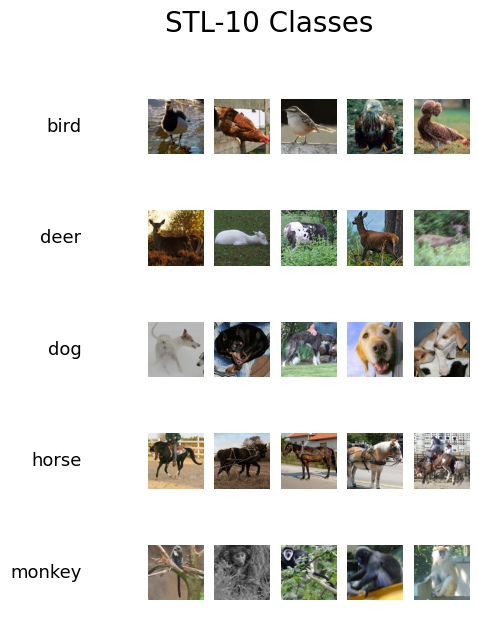

In [77]:
# Define the class mapping for bird, deer, dog, horse, and monkey
class_mapping = {1: 'bird', 4: 'deer', 5: 'dog', 6: 'horse', 7: 'monkey'}

# Visualize STL-10 classes
visualise_stl10(class_mapping)

After visualizing the data, implement the `STL10_loader` class to create a custom data loader that initializes the dataset, extracts the target classes, and applies the necessary image transformations. Once these tasks are completed, you will move on to fine-tuning the ConvNet on this dataset in the next section.

In [78]:
# Similarly to the above sections we will use the original STL10 dataset implemented in torchvision
class STL10_loader(Dataset):
    def __init__(self, root, train=True, transform=None):
        '''
        Initializes the STL10 dataset.

        Args:
            root (str): Root directory of the dataset.
            train (bool): If True, use the training set, otherwise use the test set.
            transform (callable, optional): A function/transform to apply to the images.
        '''

        split = 'train' if train else 'test'

        dset = torchvision.datasets.CIFAR100(root=root, split=split, download=True, transform=transform)
        self.loader = DataLoader(dset, batch_size=batch_size, shuffle=True)
        self.batch_size = batch_size
        
    def __len__(self):
        '''
        Returns the number of samples in the dataset.
        '''
        return self.loader.__len__()
    def __iter__(self):
        '''
        Returns an iterator for the dataset.

        Returns:
            iter: An iterator for the dataset.
        '''
        return self.loader.__iter__()

<a id="section-9"></a>
### **Section 9: Fine-tuning ConvNet on STL-10 (14 points)**

In this section, you will load the pre-trained parameters of the ConvNet (trained on CIFAR-100) and modify the output layer to adapt it to the new dataset containing 5 classes. You can either first load the pre-trained parameters and then modify the output layer, or change the output layer before loading the matched pre-trained parameters. Once modified, you will train the model and document the settings of hyperparameters, accuracy, and learning curve. Additionally, visualize both the training loss and accuracy to assess the learning process. To gain a deeper understanding of the feature learning process, consider using techniques like [**t-sne**](https://lvdmaaten.github.io/tsne/) for feature space visualization.

In [79]:
def stl10_training_sess(cfg, test=False, disable_log=True):
    if cfg.model == 'TwoLayerNet':
        model = TwoLayerNet(
            input_size=cfg.input_size, 
            hidden_size=cfg.hidden_size, 
            num_classes=cfg.num_classes, 
            activation=cfg.activation,
            norm=cfg.norm,
            more_layers=cfg.more_layers
        )
    elif cfg.model == 'ConvNet':
        model = ConvNet(
            activation=cfg.activation,
            norm=cfg.norm,
            pool=cfg.pool,
            more_layers=cfg.more_layers,
        )
    else:
        raise ValueError("Invalid model configuration")

    if not disable_log:
        print(summary(model))
    optimizer = create_optimizer(model, cfg.learning_rate, cfg.optimizer)
    transform = create_transforms()
    dset = torchvision.datasets.STL10(
        root='./data', 
        split='train',
        download=True, 
        transform=transform,
    )
    train_set, val_set = torch.utils.data.random_split(dset, [0.9, 0.1])
    train_data_loader = torch.utils.data.DataLoader(train_set, batch_size=cfg.batch_size, shuffle=True)
    criterion = nn.CrossEntropyLoss()

    train(
        net=model, 
        train_loader=train_data_loader, 
        criterion=criterion, 
        optimizer=optimizer, 
        epochs=cfg.num_epochs, 
        disable_log=disable_log
    )

    if test:
        torchvision.datasets.STL10(
            root='./data', 
            split='test',
            download=True, 
            transform=transform,
        )
        test_data_loader = torch.utils.data.DataLoader(test_set, batch_size=cfg.batch_size, shuffle=False)
        return validate(model, test_data_loader)
    
    val_data_loader = torch.utils.data.DataLoader(val_set, batch_size=cfg.batch_size, shuffle=True)
    acc = validate(net=model, testloader=val_data_loader, disable_log=True)

    return acc


<a id="section-10"></a>
### **Section 10: Bonus Challenge (optional)**

Try to achieve the highest possible accuracy on the test dataset (5 classes from STL-10) by adjusting hyperparameters, modifying architectures, or applying techniques like data augmentation. The top-performing teams will earn bonus points that can significantly boost their final lab grade, even allowing it to exceed 10 (up to 11):

- **1st place:** +1.0 to the final grade of the final lab
- **2nd place:** +0.8 to the final grade of the final lab
- **3rd place:** +0.6 to the final grade of the final lab
- **4th place:** +0.4 to the final grade of the final lab
- **5th place:** +0.2 to the final grade of the final lab

**Hint:** You may use techniques like data augmentation, freezing early layers, modifying architecture, or optimizing hyperparameters. Only data from CIFAR-100 and STL-10 can be used, and you cannot add more than 3 additional convolutional layers.

In [81]:
# YOUR CODE HERE

<a id="section-x"></a>
### **Section X: Individual Contribution Report *(Mandatory)***

Because we want each student to contribute fairly to the submitted work, we ask you to fill out the textcells below. Write down your contribution to each of the assignment components in percentages. Naturally, percentages for one particular component should add up to 100% (e.g. 30% - 30% - 40%). No further explanation has to be given.

| Name | Contribution on Research | Contribution on Programming | Contribution on Writing |
| -------- | ------- | ------- | ------- |
|  | - % | - % | - % |
|  | - % | - % | - % |
|  | - % | - % | - % |
|  | - % | - % | - % |

### - End of Notebook -